In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import seaborn as sns
import scipy.io
from matplotlib import cm, colors
import mne
from scipy.signal import coherence, hilbert

In [2]:
edf_path = r"C:\Users\Juan\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf"
sfreq_target = 256            # Frecuencia de muestreo a la que normalizamos (Hz)
fmin, fmax = 8, 13 #Frecuencias mínimas y máximas de corte, en este caso las alpha
raw = mne.io.read_raw_edf(edf_path, preload=True)
raw.resample(sfreq_target)
raw.filter(1., 45., fir_design='firwin')
data = raw.get_data()
ch_names = raw.info['ch_names']
n_channels = len(ch_names)

# ====== 2. MATRIZ DE COHERENCIA ESPECTRAL ======
coh_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        f, Cxy = coherence(data[i], data[j], fs=sfreq_target, nperseg=sfreq_target*2)
        mask = (f >= fmin) & (f <= fmax)
        coh_matrix[i, j] = np.mean(Cxy[mask])

coh_df = pd.DataFrame(coh_matrix, index=ch_names, columns=ch_names)
#coh_df.to_csv("connectivity_coherence.csv")

Extracting EDF parameters from C:\Users\Juan\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Juan\AppData\Local\Temp\ipykernel_58884\3662268677.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Sampling frequency of the instance is already 256.0, returning unmodified.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (3.301 s)



In [78]:
umbral = np.percentile(coh_matrix.ravel(), 25)
coh_matrix_umbral = np.where(coh_matrix < umbral, 0, coh_matrix)
coh_df = pd.DataFrame(data = coh_matrix_umbral, index = ch_names, columns = ch_names)
coh_df

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
FP1-F7,1.000000,0.041516,0.000000,0.000000,0.245461,0.091470,0.083292,0.014270,0.229592,0.045192,...,0.082527,0.000000,0.000000,0.054483,0.016188,0.000000,0.071638,0.073998,0.000000,0.000000
F7-T7,0.041516,1.000000,0.010846,0.000000,0.154107,0.045551,0.012693,0.000000,0.035476,0.000000,...,0.000000,0.026270,0.000000,0.026036,0.015386,0.010846,0.640231,0.063892,0.000000,0.026270
T7-P7,0.000000,0.010846,1.000000,0.030829,0.024040,0.051739,0.126262,0.094412,0.014721,0.013451,...,0.000000,0.088024,0.057794,0.025707,0.083494,1.000000,0.023849,0.026371,0.000000,0.088024
P7-O1,0.000000,0.000000,0.030829,1.000000,0.000000,0.000000,0.151886,0.372296,0.000000,0.017126,...,0.000000,0.068543,0.232739,0.015585,0.128957,0.030829,0.000000,0.015742,0.000000,0.068543
FP1-F3,0.245461,0.154107,0.024040,0.000000,1.000000,0.074486,0.069103,0.012952,0.459356,0.031465,...,0.033796,0.029603,0.000000,0.033940,0.010629,0.024040,0.068602,0.000000,0.000000,0.029603
F3-C3,0.091470,0.045551,0.051739,0.000000,0.074486,1.000000,0.135467,0.015510,0.033888,0.175770,...,0.029258,0.016410,0.030438,0.352572,0.130079,0.051739,0.015081,0.000000,0.000000,0.016410
C3-P3,0.083292,0.012693,0.126262,0.151886,0.069103,0.135467,1.000000,0.091399,0.000000,0.059252,...,0.018359,0.029551,0.135414,0.054305,0.437839,0.126262,0.025413,0.000000,0.000000,0.029551
P3-O1,0.014270,0.000000,0.094412,0.372296,0.012952,0.015510,0.091399,1.000000,0.000000,0.000000,...,0.000000,0.015114,0.082872,0.022889,0.033068,0.094412,0.018789,0.000000,0.000000,0.015114
FP2-F4,0.229592,0.035476,0.014721,0.000000,0.459356,0.033888,0.000000,0.000000,1.000000,0.063955,...,0.080667,0.039564,0.000000,0.036033,0.000000,0.014721,0.000000,0.000000,0.025067,0.039564
F4-C4,0.045192,0.000000,0.013451,0.017126,0.031465,0.175770,0.059252,0.000000,0.063955,1.000000,...,0.158032,0.057805,0.000000,0.331632,0.071899,0.013451,0.000000,0.000000,0.084901,0.057805


In [79]:
G= nx.from_pandas_adjacency(coh_df)

####Hubs (por grado)
degree_dict = dict(G.degree()) #Hacer diccionario con nodo:grado
hubs = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)#Ordenar de mayor a menor
top_hubs = hubs[:10] # Mostrar los 10 nodos más conectados
print("Hubs (por grado):")
for node, deg in top_hubs:
    print(f"Nodo {node}: grado {deg}")
    
####Grado
df_grado = pd.DataFrame(index = range(len(degree_dict)), columns = ['Nodo', 'Grado'])
i = 0
for entrada in degree_dict:
    df_grado.iloc[i,0] = i
    df_grado.iloc[i,1] = degree_dict[entrada]
    i += 1

####Comunidades
comm = nx.community.greedy_modularity_communities(G) #Algoritmo Clauset-Newman-Moore que busca 
#la división de nodos en comunidades que tenga más conexiones dentro que entre ellas.
print('El número de comunidades es: ', len(comm))

Hubs (por grado):
Nodo T8-P8-0: grado 22
Nodo FZ-CZ: grado 22
Nodo T8-P8-1: grado 22
Nodo F3-C3: grado 21
Nodo C3-P3: grado 21
Nodo C4-P4: grado 21
Nodo T7-P7: grado 20
Nodo CZ-PZ: grado 20
Nodo P7-T7: grado 20
Nodo FP1-F3: grado 19
El número de comunidades es:  5


In [101]:
coord_eeg = pd.read_csv(r'C:\Users\Juan\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\coordenadas_bipolares_eeg.csv')
coord_df = pd.DataFrame(coord_eeg)

coord_df.set_index('canal', inplace = True)

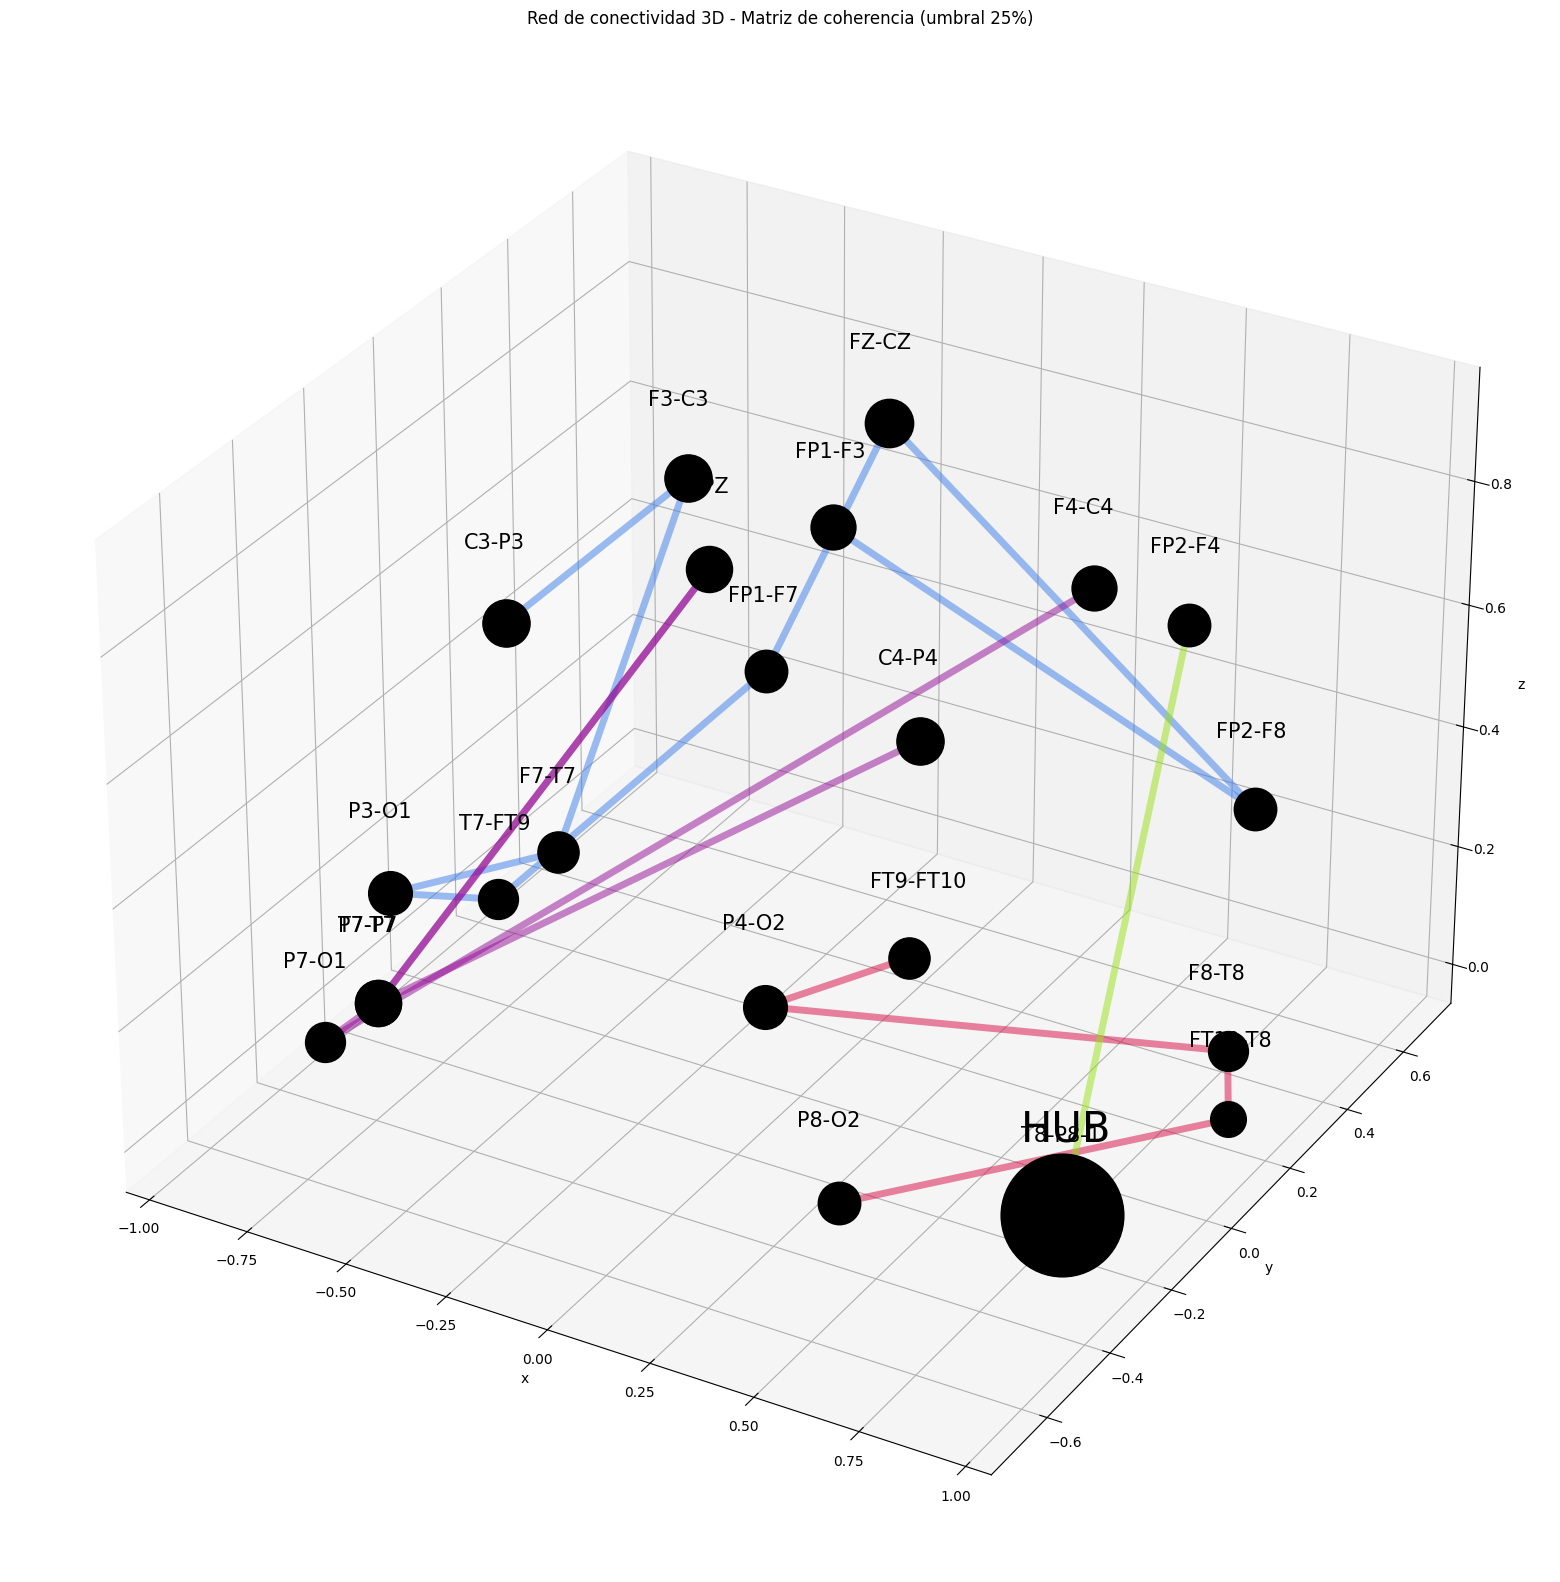

In [107]:
GG = nx.from_pandas_adjacency(coh_df)

pos3D = {nodo: (coord_df.loc[nodo, 'x'],
                coord_df.loc[nodo, 'y'],
                coord_df.loc[nodo, 'z']) for nodo in coord_df.index}

tamanos = df_grado.Grado
tamanos = tamanos.values

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

nombre, grado = hubs[0]
top_hub = nombre
idx = 0

for i, (x, y, z) in pos3D.items():
    if i == top_hub:
        ax.scatter(x, y, z, s=tamanos[idx]*355, c='black')
        ax.text(x-0.1,y,z+0.1,'HUB', size = 30, color = 'black')
        idx += 1
    else:
        ax.scatter(x, y, z, s=tamanos[idx]*55, c='black')
        ax.text(x-0.1,y,z+0.1, i, size = 15, color = 'black')
        idx += 1

colores = ['#3b7eeb', '#940c96', '#d60b44', '#99e014', '#37edc9', '#ebe34b', '#0a0a0a']

for n_comm, comm_x in enumerate(comm):
    for k in range(len(comm_x)-1):
        nodo1, nodo2 = list(comm_x)[k], list(comm_x)[k+1]
        x = [pos3D[list(comm_x)[k]][0], pos3D[list(comm_x)[k+1]][0]]
        y = [pos3D[list(comm_x)[k]][1], pos3D[list(comm_x)[k+1]][1]]
        z = [pos3D[list(comm_x)[k]][2], pos3D[list(comm_x)[k+1]][2]]
        ax.plot(x, y, z, c=colores[n_comm], alpha = 0.5, linewidth = 5)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad 3D - Matriz de coherencia (umbral 25%)')


plt.show()

In [108]:
coh_df

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
FP1-F7,1.000000,0.041516,0.000000,0.000000,0.245461,0.091470,0.083292,0.014270,0.229592,0.045192,...,0.082527,0.000000,0.000000,0.054483,0.016188,0.000000,0.071638,0.073998,0.000000,0.000000
F7-T7,0.041516,1.000000,0.010846,0.000000,0.154107,0.045551,0.012693,0.000000,0.035476,0.000000,...,0.000000,0.026270,0.000000,0.026036,0.015386,0.010846,0.640231,0.063892,0.000000,0.026270
T7-P7,0.000000,0.010846,1.000000,0.030829,0.024040,0.051739,0.126262,0.094412,0.014721,0.013451,...,0.000000,0.088024,0.057794,0.025707,0.083494,1.000000,0.023849,0.026371,0.000000,0.088024
P7-O1,0.000000,0.000000,0.030829,1.000000,0.000000,0.000000,0.151886,0.372296,0.000000,0.017126,...,0.000000,0.068543,0.232739,0.015585,0.128957,0.030829,0.000000,0.015742,0.000000,0.068543
FP1-F3,0.245461,0.154107,0.024040,0.000000,1.000000,0.074486,0.069103,0.012952,0.459356,0.031465,...,0.033796,0.029603,0.000000,0.033940,0.010629,0.024040,0.068602,0.000000,0.000000,0.029603
F3-C3,0.091470,0.045551,0.051739,0.000000,0.074486,1.000000,0.135467,0.015510,0.033888,0.175770,...,0.029258,0.016410,0.030438,0.352572,0.130079,0.051739,0.015081,0.000000,0.000000,0.016410
C3-P3,0.083292,0.012693,0.126262,0.151886,0.069103,0.135467,1.000000,0.091399,0.000000,0.059252,...,0.018359,0.029551,0.135414,0.054305,0.437839,0.126262,0.025413,0.000000,0.000000,0.029551
P3-O1,0.014270,0.000000,0.094412,0.372296,0.012952,0.015510,0.091399,1.000000,0.000000,0.000000,...,0.000000,0.015114,0.082872,0.022889,0.033068,0.094412,0.018789,0.000000,0.000000,0.015114
FP2-F4,0.229592,0.035476,0.014721,0.000000,0.459356,0.033888,0.000000,0.000000,1.000000,0.063955,...,0.080667,0.039564,0.000000,0.036033,0.000000,0.014721,0.000000,0.000000,0.025067,0.039564
F4-C4,0.045192,0.000000,0.013451,0.017126,0.031465,0.175770,0.059252,0.000000,0.063955,1.000000,...,0.158032,0.057805,0.000000,0.331632,0.071899,0.013451,0.000000,0.000000,0.084901,0.057805
